<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/LSTM_spam_detection_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [38]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [39]:
# import the data
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [40]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [41]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [44]:
# split the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [45]:
# convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [46]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print("There are %s unique tokens" % V)

There are 7259 unique tokens


In [47]:
# pad sequences
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3733, 162)


In [48]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data tensor:', data_test.shape)

Shape of data tensor: (1839, 162)


In [49]:
# create the model

# choose embedding dimensionality
D = 20
M = 15

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


In [50]:
# compile and fit
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

print('training model...')
r = model.fit(
    data_train, 
    Ytrain,
    epochs = 10,
    validation_data = (data_test, Ytest)
)

training model...
Epoch 1/10
117/117 [==============================] - 8s 71ms/step - loss: 0.4959 - accuracy: 0.8444 - val_loss: 0.2894 - val_accuracy: 0.8700
Epoch 2/10
117/117 [==============================] - 10s 86ms/step - loss: 0.1600 - accuracy: 0.9630 - val_loss: 0.0958 - val_accuracy: 0.9766
Epoch 3/10
117/117 [==============================] - 10s 86ms/step - loss: 0.0617 - accuracy: 0.9874 - val_loss: 0.0682 - val_accuracy: 0.9826
Epoch 4/10
117/117 [==============================] - 13s 112ms/step - loss: 0.0364 - accuracy: 0.9938 - val_loss: 0.0615 - val_accuracy: 0.9837
Epoch 5/10
117/117 [==============================] - 8s 69ms/step - loss: 0.0247 - accuracy: 0.9960 - val_loss: 0.0626 - val_accuracy: 0.9826
Epoch 6/10
117/117 [==============================] - 8s 69ms/step - loss: 0.0198 - accuracy: 0.9962 - val_loss: 0.0656 - val_accuracy: 0.9804
Epoch 7/10
117/117 [==============================] - 8s 68ms/step - loss: 0.0109 - accuracy: 0.9989 - val_loss: 0.0667 

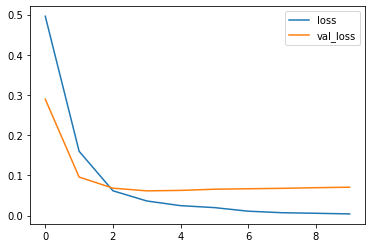

In [51]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

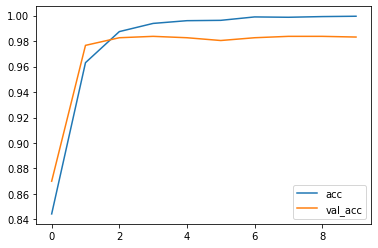

In [52]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()